# 数据分析与建模
## 数据的分析和模型的建立
## 例子1: 波士顿房价数据的建模

本文通过网上下载的波士顿房价数据进行分析和建模，以达到分析房价走势的目地。

---
## 第一步. 导入数据
此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

In [1]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd

In [2]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据

我们在拿到数据后要对其进行进一步的分析,以思考建立怎么样的模型。
我们的目标是建立一个房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 逐步分析数据：基础统计运算

拿到数据之后我们首先对数据进行基础的统计运算，以得到数据的一些基础素质。
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [6]:
#TODO 1

#目标：计算价值的最小值
minimum_price = np.min(prices)

#目标：计算价值的最大值
maximum_price = np.max(prices)

#目标：计算价值的平均值
mean_price = np.mean(prices)

#目标：计算价值的中值
median_price = np.median(prices)

#目标：计算价值的标准差
std_price = np.std(prices,ddof=1)

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


## 第三步. 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

我们现在需要知道随着这些数值的变化，对房屋价格所产生的影响

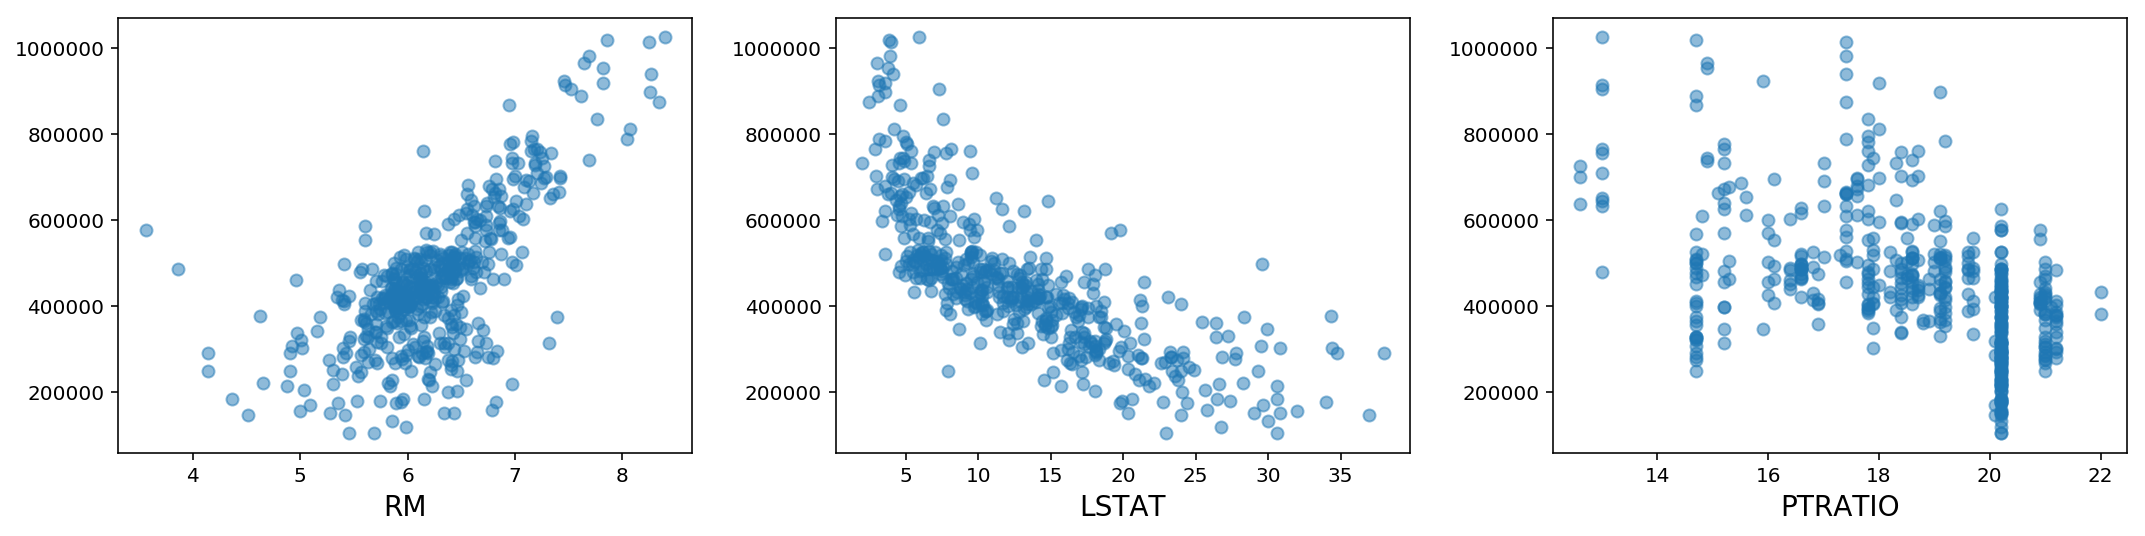

In [7]:
#导入库matplotlib
import matplotlib.pyplot as plt

#使输出的图像以更高清的方式显示
%config InlineBackend.figure_format = 'retina'

#创建figure并调整图像的宽高
plt.figure(figsize = (18, 4))

for i, key in enumerate(['RM','LSTAT','PTRATIO']):
    plt.subplot(1, 3, i+1)
    plt.xlabel(key, fontsize=14)
    plt.scatter(features[key], prices, alpha = 0.5)

#调整图像间的水平间距
plt.subplots_adjust(wspace=0.25)



###可以得出以下结论：
- 'RM'的值增大，'MEDV'的值就会增大。因为房间多了意味着房子面积增大了，房屋的价格当然就增大了。从散点图看出呈上升趋势，所以散点图可以证明了此观点。
- 'LSTAT'的值增加，'MEDV'的值就会减少。因为低收入人群数量增加后，普遍购买力就会减小，市场需求变少，房屋价格就会降低。从散点图看出呈反比关系，所以散点图可以证明了此观点。
- 'PTRATIO'特征，学生与老师数量的比例增大，应该只会影响教学质量，应该跟该地区的房价没有联系。从散点图看出，未呈明显趋势，所以散点图也证明了此观点。

## 第四步.  数据分割与重排
接下来，把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [3]:
# TODO 2

# 提示： 导入train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 0)


---
## 第五步. 模型衡量标准
在项目的第五步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。


In [4]:
# TODO 3

# 提示： 导入r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""   
    
    score = r2_score(y_true, y_predict)

    return score

In [5]:
# TODO 3 可选

# 不允许导入任何计算决定系数的库

def performance_metric2(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    #make sure y_true and y_predict are numpy.ndarray in calculation
    if not isinstance(y_true, np.ndarray):
        y_true = np.array(y_true)       
    if not isinstance(y_predict, np.ndarray):
        y_predict = np.array(y_predict)
    
    
    #difine the residuals between y_true and y_predict as e
    e = y_true - y_predict
                                                  
    #calculate mean of observed data(y_true)
    mean_y_true = y_true.mean()
    
    #calculate total sum of squares
    diff = y_true - mean_y_true
    SS_tot = (diff ** 2).sum()
    
    #calculate residual sum of squares
    SS_res = (e ** 2).sum()
    
    score = 1 - SS_res/SS_tot

    return score

### 拟合程度

通过计算拟合程度来计算建立的模型是否符合预期

In [7]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.
